## **Data Analysis on Electric Vehicle**


In [43]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv('/content/dataset.csv')

In [45]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [46]:
df.rename(columns={'County': 'Country'}, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   Country                                            112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [48]:
df.columns

Index(['VIN (1-10)', 'Country', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [49]:
df['Postal Code'] = df['Postal Code'].astype('int64')
df['Model Year'] = df['Model Year'].astype('int64')
df['Electric Range'] = df['Electric Range'].astype('int64')
df['Base MSRP'] = df['Base MSRP'].astype('int64')
df['Country'] = df['Country'].astype('category')
df['City'] = df['City'].astype('category')
df['State'] = df['State'].astype('category')
df['Make'] = df['Make'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype('category')
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('category')


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         112634 non-null  object  
 1   Country                                            112634 non-null  category
 2   City                                               112634 non-null  category
 3   State                                              112634 non-null  category
 4   Postal Code                                        112634 non-null  int64   
 5   Model Year                                         112634 non-null  int64   
 6   Make                                               112634 non-null  category
 7   Model                                              112614 non-null  category
 8   Electric Vehicle Type                              112634 non-nu

In [51]:
df.isnull().sum()

,0
VIN (1-10),0
Country,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [52]:
df['Model'].fillna(df['Model'].mode()[0], inplace=True)

<ipython-input-52-e40a490109a7>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [53]:
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True)

<ipython-input-53-7eaaf71f3eb8>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [54]:
df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0], inplace=True)

<ipython-input-54-5f39997fd240>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [55]:
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)

<ipython-input-55-0bbe8eaeaa67>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         112634 non-null  object  
 1   Country                                            112634 non-null  category
 2   City                                               112634 non-null  category
 3   State                                              112634 non-null  category
 4   Postal Code                                        112634 non-null  int64   
 5   Model Year                                         112634 non-null  int64   
 6   Make                                               112634 non-null  category
 7   Model                                              112634 non-null  category
 8   Electric Vehicle Type                              112634 non-nu

In [57]:
df[['Model Year', 'Electric Range', 'Base MSRP']].describe()

,Model Year,Electric Range,Base MSRP
count,112634.000000,112634.000000,112634.000000
mean,2019.003365,87.812987,1793.439681
std,2.892364,102.334216,10783.753486
min,1997.000000,0.000000,0.000000
25%,2017.000000,0.000000,0.000000
50%,2020.000000,32.000000,0.000000
75%,2022.000000,208.000000,0.000000
max,2023.000000,337.000000,845000.000000


In [58]:
df['Make'].value_counts()

,count
Make,
TESLA,52078
NISSAN,12880
CHEVROLET,10182
FORD,5819
BMW,4680
KIA,4483
TOYOTA,4405
VOLKSWAGEN,2514
AUDI,2332


In [59]:
print(df.dtypes)

VIN (1-10)                                             object
Country                                              category
City                                                 category
State                                                category
Postal Code                                             int64
Model Year                                              int64
Make                                                 category
Model                                                category
Electric Vehicle Type                                category
Clean Alternative Fuel Vehicle (CAFV) Eligibility    category
Electric Range                                          int64
Base MSRP                                               int64
Legislative District                                  float64
DOL Vehicle ID                                          int64
Vehicle Location                                       object
Electric Utility                                       object
2020 Cen

In [60]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [61]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                      Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.004485        0.000385   0.001151   
Model Year              -0.004485    1.000000       -0.288433  -0.229130   
Electric Range           0.000385   -0.288433        1.000000   0.085025   
Base MSRP                0.001151   -0.229130        0.085025   1.000000   
Legislative District    -0.060626    0.010408        0.024327   0.012383   
DOL Vehicle ID           0.003365   -0.068295        0.009682   0.000504   
2020 Census Tract        0.501170    0.000714        0.000722   0.000979   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  
Postal Code                      -0.060626        0.003365           0.501170  
Model Year                        0.010408       -0.068295           0.000714  
Electric Range                    0.024327        0.009682           0.000722  
Base MSRP                         0.012383        0.000504           0.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='Base MSRP'>

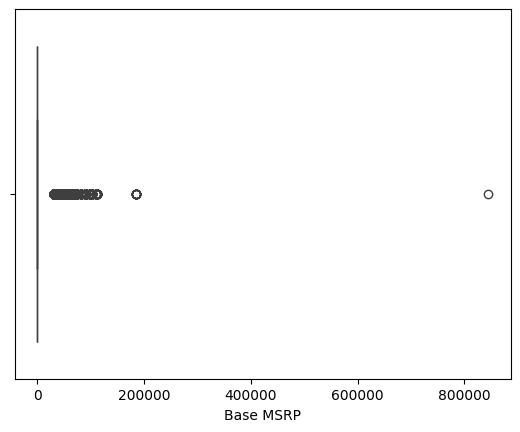

In [62]:
import seaborn as sns
sns.boxplot(x=df['Base MSRP'])

In [63]:
import plotly.express as px

In [65]:
fig = px.scatter(df, x='Electric Range', y='Base MSRP', title='Scatter Plot of Electric Range vs Base MSRP')
fig.show()

In [66]:
fig = px.box(df, x='Make', y='Electric Range', title='Box Plot of Make vs Electric Range')
fig.show()

In [67]:
fig = px.pie(df, names='Make', values='Electric Range', title='Electric Range Distribution by Make')
fig.show()

In [68]:
location_data = df.groupby('State').size().reset_index(name='EV Count')

fig = px.choropleth(
    location_data,
    locations='State',
    locationmode='USA-states',
    color='EV Count',
    scope="usa",
    title='Number of Electric Vehicles by State'
)


fig.show()

<ipython-input-68-60b362cd9725>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [70]:
location_data = df.groupby(['State', 'Model Year']).size().reset_index(name='EV Count')


fig = px.choropleth(
    location_data,
    locations='State',
    locationmode='USA-states',
    color='EV Count',
    scope="usa",
    animation_frame='Model Year',
    title='Number of Electric Vehicles by State Over Time'
)

fig.show()

<ipython-input-70-0db5efdebefb>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [71]:
make_year_data = df.groupby(['Make', 'Model Year']).size().reset_index(name='Count')

<ipython-input-71-29642a21d266>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [72]:
fig = px.bar(
    make_year_data,
    x='Make',
    y='Count',
    color='Make',
    animation_frame='Model Year',
    title='Electric Vehicle Make Count Over Time'
)

fig.show()